In [1]:
!pip install yfinance

Defaulting to user installation because normal site-packages is not writeable


In [2]:
import yfinance as yf # yahoo finance 套件
import pandas as pd # 結構化資料處理套件
import datetime as dt # 時間套件

In [3]:
# 輸入股票代號
stock_id = "ORCL"

'''今天往前算幾天'''
# 資料結束時間
end = dt.date.today()
# 抓取半年資料（現在-過去180天）
start = end - dt.timedelta(days=360)

'''抓取特定時間'''
# start = dt.datetime(2024, 1, 1)  # 指定的開始日期
# end = dt.datetime(2024, 6, 30)    # 指定的結束日期


# 參數1: 股票代號, 參數2: 開始時間, 參數3: 結束時間
df = yf.download(stock_id, start=start, end=end).reset_index()

# 刪除 Ticker 欄位並取代
df.columns = df.columns.droplevel('Ticker')

df

C:\Users\raymo\AppData\Local\Temp\ipykernel_112928\398089126.py:16: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(stock_id, start=start, end=end).reset_index()
[*********************100%***********************]  1 of 1 completed


Price,Date,Close,High,Low,Open,Volume
0,2024-09-27,166.992630,167.358794,164.785712,166.349352,8974400
1,2024-09-30,168.635422,168.754189,164.726329,167.744748,10210300
2,2024-10-01,165.429001,168.744301,164.251321,168.457311,7595100
3,2024-10-02,165.973297,167.428061,165.537851,165.864436,7073000
4,2024-10-03,165.132095,166.121740,164.518521,165.161783,4735700
...,...,...,...,...,...,...
240,2025-09-15,302.140015,307.029999,297.290009,306.450012,40004000
241,2025-09-16,306.649994,319.970001,302.269989,314.059998,51923300
242,2025-09-17,301.410004,308.660004,295.029999,307.690002,27707900
243,2025-09-18,296.619995,303.820007,292.000000,303.040009,24673100


In [4]:
# 計算8日 SMA
df['8_SMA'] = df['Close'].rolling(window=8).mean()

# 計算13日 SMA
df['13_SMA'] = df['Close'].rolling(window=13).mean()

# 計算20日 SMA
df['20_SMA'] = df['Close'].rolling(window=20).mean()

# 列印最後筆數
df.tail()

Price,Date,Close,High,Low,Open,Volume,8_SMA,13_SMA,20_SMA
240,2025-09-15,302.140015,307.029999,297.290009,306.450012,40004000,270.787497,255.177691,248.760500
241,2025-09-16,306.649994,319.970001,302.269989,314.059998,51923300,281.243746,260.626921,251.639499
242,2025-09-17,301.410004,308.660004,295.029999,307.690002,27707900,289.819996,265.326152,254.978999
243,2025-09-18,296.619995,303.820007,292.000000,303.040009,24673100,297.087496,270.748459,258.056999
244,2025-09-19,308.660004,311.109985,297.320007,299.000000,40540200,305.481247,277.160767,261.831999


In [5]:
# 計算每個交易日的價格變動，即當天收盤價與前一天收盤價的差異
df['Change'] = df['Close'] - df['Close'].shift(1)

# 將變動值中的正數部分視為“Gain”（增益），如果變動為負則記為0
df['Gain'] = df['Change'].apply(lambda x: x if x > 0 else 0)

# 將變動值中的負數部分視為“Loss”（損失），取其絕對值，如果變動為正則記為0
df['Loss'] = df['Change'].apply(lambda x: abs(x) if x < 0 else 0)

df.tail()

# 計算過去14個交易日的平均增益
df['Avg Gain'] = df['Gain'].rolling(window=14).mean()

# 計算過去14個交易日的平均損失
df['Avg Loss'] = df['Loss'].rolling(window=14).mean()

# 計算相對強弱指數的相對強度（RS），即平均增益與平均損失的比值
df['RS'] = df['Avg Gain'] / df['Avg Loss']

# 計算相對強弱指數（RSI），使用RS公式計算出來
df['RSI'] = 100 - (100 / (1 + df['RS']))

# 顯示最後幾行的數據
df.tail()

Price,Date,Close,High,Low,Open,Volume,8_SMA,13_SMA,20_SMA,Change,Gain,Loss,Avg Gain,Avg Loss,RS,RSI
240,2025-09-15,302.140015,307.029999,297.290009,306.450012,40004000,270.787497,255.177691,248.760500,9.960022,9.960022,0.000000,8.671429,3.905000,2.220597,68.949852
241,2025-09-16,306.649994,319.970001,302.269989,314.059998,51923300,281.243746,260.626921,251.639499,4.509979,4.509979,0.000000,8.993571,3.819286,2.354778,70.191769
242,2025-09-17,301.410004,308.660004,295.029999,307.690002,27707900,289.819996,265.326152,254.978999,-5.239990,0.000000,5.239990,8.879286,4.193571,2.117357,67.921541
243,2025-09-18,296.619995,303.820007,292.000000,303.040009,24673100,297.087496,270.748459,258.056999,-4.790009,0.000000,4.790009,8.557142,4.535714,1.886614,65.357335
244,2025-09-19,308.660004,311.109985,297.320007,299.000000,40540200,305.481247,277.160767,261.831999,12.040009,12.040009,0.000000,9.417143,3.522143,2.673697,72.779465


In [6]:
'''
第一日
# 平滑係數公式： α = 2 / (span + 1) = 2 / (span + 1)
# α = 2 / (8 + 1) = 2 / (8 + 1) ≈ 0.2222
# 0.2222 * 770.0 + (1-0.2222) * 776.0 = 171.094 + 603.5728 = 774.6668
'''

# 計算8天的指數移動平均線（EMA），並將其存儲在 'EMA_8' 列中
# adjust=False 表示在計算 EMA 時，只考慮當前值和前一個 EMA 的遞歸計算方式，而不考慮所有歷史數據
df['EMA_8'] = df['Close'].ewm(span=8, adjust=False).mean()

# 計算13天的指數移動平均線（EMA），並將其存儲在 'EMA_13' 列中
df['EMA_13'] = df['Close'].ewm(span=13, adjust=False).mean()

# 計算MACD線：8天EMA減去13天EMA，並將其存儲在 'MACD' 列中
df['MACD'] = df['EMA_8'] - df['EMA_13']

# 顯示DataFrame的最後幾行數據
df.head(3)

Price,Date,Close,High,Low,Open,Volume,8_SMA,13_SMA,20_SMA,Change,Gain,Loss,Avg Gain,Avg Loss,RS,RSI,EMA_8,EMA_13,MACD
0,2024-09-27,166.992630,167.358794,164.785712,166.349352,8974400,NaN,NaN,NaN,NaN,0.000000,0.000000,NaN,NaN,NaN,NaN,166.992630,166.992630,0.000000
1,2024-09-30,168.635422,168.754189,164.726329,167.744748,10210300,NaN,NaN,NaN,1.642792,1.642792,0.000000,NaN,NaN,NaN,NaN,167.357695,167.227315,0.130380
2,2024-10-01,165.429001,168.744301,164.251321,168.457311,7595100,NaN,NaN,NaN,-3.206421,0.000000,3.206421,NaN,NaN,NaN,NaN,166.929096,166.970413,-0.041316


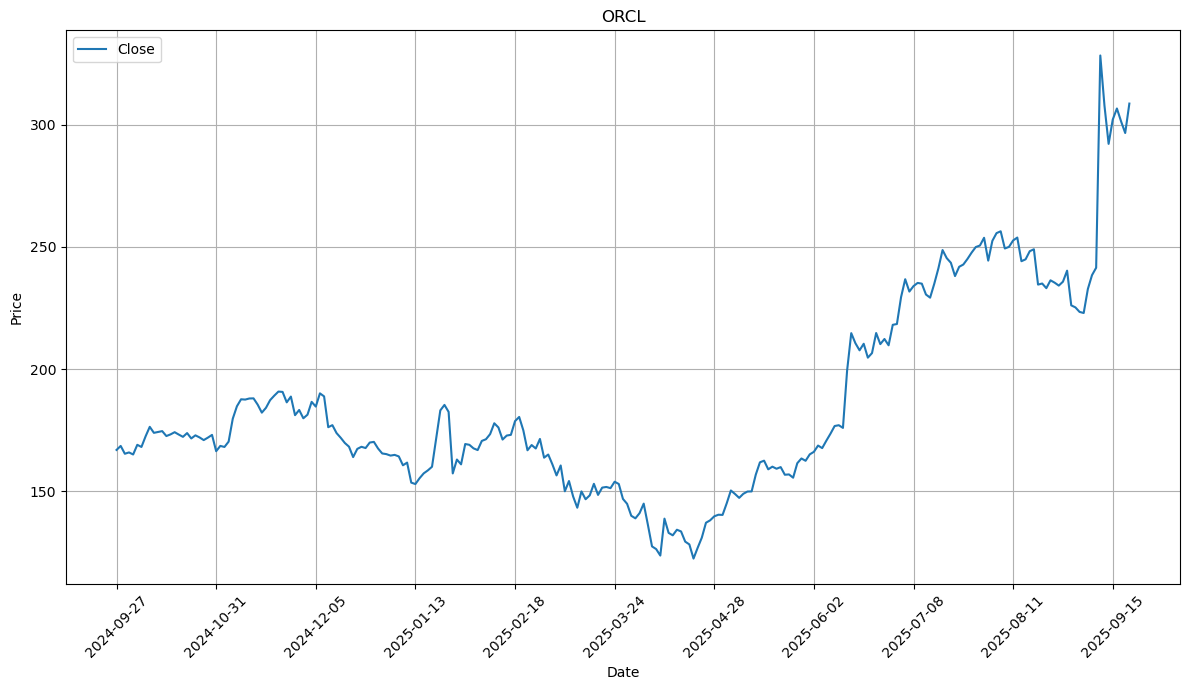

In [7]:
import matplotlib.pyplot as plt

# 畫布尺寸大小設定
plt.figure(figsize=(12, 7))

# 設定要繪製的資料欄位
plt.plot(df['Close'], label='Close')

# 設定 x 軸的時間
num = 10
date = df["Date"].dt.strftime('%Y-%m-%d')
plt.xticks(date[::len(date)//num].index,  # 設定在 x 軸上顯示標籤的位置（索引），這些位置間隔為 len(date)//num
           date[::len(date)//num],  # 設定顯示在 x 軸上的日期標籤，數量為 num，間隔為 len(date)//num
           rotation = 45) # 讓日期標籤旋轉 45 度，以避免標籤之間重疊，提高可讀性

# 設定圖表的標題，x 軸和 y 軸的標籤
plt.title(f'{stock_id}')   # 將股票代號設為圖標
plt.xlabel('Date')         # x 軸標籤
plt.ylabel('Price')  # y 軸標籤
plt.legend(loc='upper left') # 在左上角顯示圖例
plt.grid(True) # 在圖上顯示網格
plt.tight_layout()  # 自動調整圖表中的間距，避免元素之間的重疊

# 顯示圖表
plt.show()

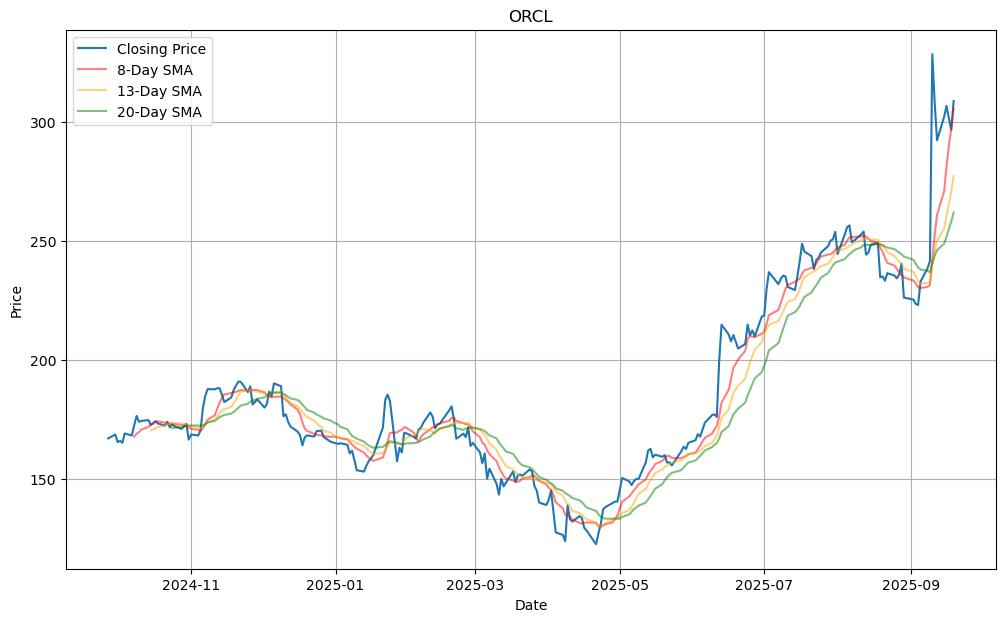

In [8]:
# 畫布尺寸大小設定
plt.figure(figsize=(12, 7))

# 設定要繪製的資料欄位
plt.plot(df['Date'], df['Close'], label='Closing Price')

# 8 天的 SMA
plt.plot(df['Date'], df['8_SMA'], label='8-Day SMA', color='red', alpha=.5)

# 13 天的 SMA
plt.plot(df['Date'], df['13_SMA'], label='13-Day SMA', color='orange', alpha=.5)

# 20 天的 SMA
plt.plot(df['Date'], df['20_SMA'], label='20-Day SMA', color='green', alpha=.5)

# 將股票代號設為圖標
plt.title(f'{stock_id}')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)

plt.show()

In [9]:
!pip install mplfinance

Defaulting to user installation because normal site-packages is not writeable


In [10]:
# 將原始的 dataframe 再建立一個出來
kplot_df = df.set_index('Date')
kplot_df['2025-08-01':'2025-09-17'].tail()

Price,Close,High,Low,Open,Volume,8_SMA,13_SMA,20_SMA,Change,Gain,Loss,Avg Gain,Avg Loss,RS,RSI,EMA_8,EMA_13,MACD
Date,,,,,,,,,,,,,,,,,,
2025-09-11,307.859985,331.000000,304.600006,330.339996,69986000,252.591246,245.585383,243.706499,-20.470001,0.000000,20.470001,8.189284,2.853571,2.869837,74.159118,266.742511,256.555225,10.187286
2025-09-12,292.179993,307.970001,291.750000,305.790009,51781900,260.951244,249.952306,246.067499,-15.679993,0.000000,15.679993,7.959999,3.973571,2.003236,66.702581,272.395285,261.644478,10.750807
2025-09-15,302.140015,307.029999,297.290009,306.450012,40004000,270.787497,255.177691,248.760500,9.960022,9.960022,0.000000,8.671429,3.905000,2.220597,68.949852,279.005225,267.429555,11.575670
2025-09-16,306.649994,319.970001,302.269989,314.059998,51923300,281.243746,260.626921,251.639499,4.509979,4.509979,0.000000,8.993571,3.819286,2.354778,70.191769,285.148507,273.032474,12.116032
2025-09-17,301.410004,308.660004,295.029999,307.690002,27707900,289.819996,265.326152,254.978999,-5.239990,0.000000,5.239990,8.879286,4.193571,2.117357,67.921541,288.762173,277.086407,11.675766


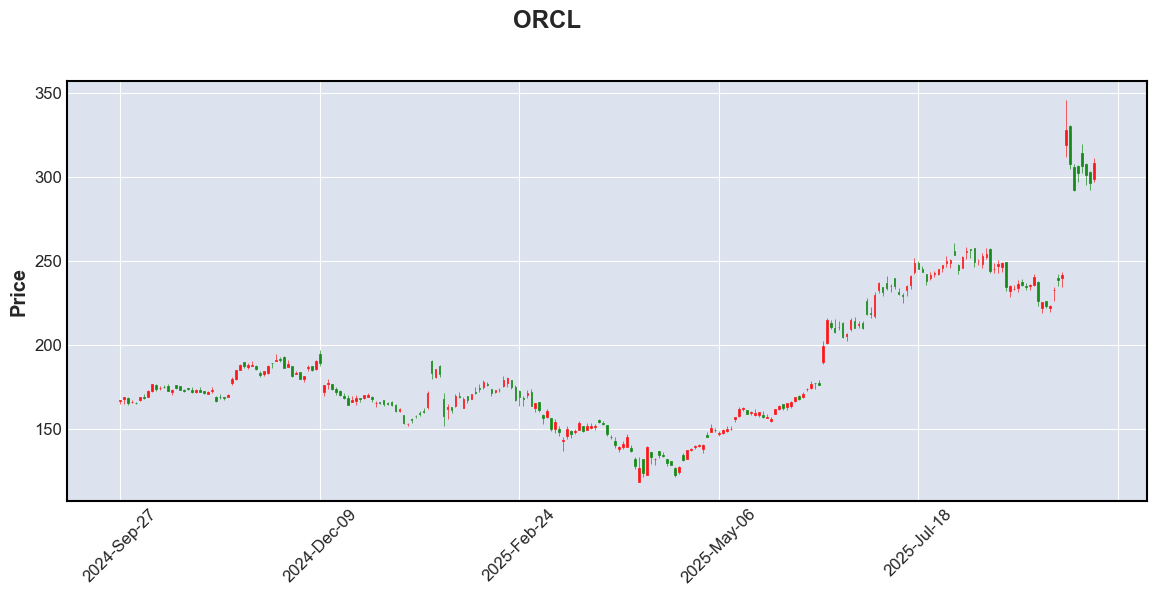

In [11]:
import mplfinance as mpf
# 設置繪圖風格
my_color = mpf.make_marketcolors(up='r', down='g', inherit=True)
my_style = mpf.make_mpf_style(base_mpf_style='default',
                marketcolors=my_color)

# 使用 mplfinance 繪製 K 線圖
mpf.plot(kplot_df, type='candle', style=my_style, title=f'{stock_id}', figsize=(15, 6))

In [12]:
# 計算 K 線長度 = abs(收盤-開盤)
df['body_length'] = abs(df['Close'] - df['Open'])

# 計算下影線長度 = abs(最高-最小)
df['lower_shadow'] = abs(df['Low'] - df[['Open', 'Close']].min(axis=1))

# 計算上影線長度 = abs(最高-最小)
df['upper_shadow'] = abs(df['High'] - df[['Open', 'Close']].max(axis=1))

#print('df',df)
# 定義 Hammer 型態的條件
hammer_condition = (
    (df['lower_shadow'] > 2 * df['body_length']) &  # 下影線長於實體的两倍
    (df['upper_shadow'] < df['body_length'] * 0.1) &  # 上影線很短
    (df['body_length'] < (df['High'] - df['Low']) * 0.4)  # 實體相對較小
)

# 提取 Hammer 型態
hammer_df = df[hammer_condition]
hammer_df.set_index('Date', inplace=True)

hammer_df

Price,Close,High,Low,Open,Volume,8_SMA,13_SMA,20_SMA,Change,Gain,...,Avg Gain,Avg Loss,RS,RSI,EMA_8,EMA_13,MACD,body_length,lower_shadow,upper_shadow
Date,,,,,,,,,,,,,,,,,,,,,
2024-12-23,167.764877,168.240971,165.810892,168.211216,6518200,168.946444,174.519511,177.829380,-0.515778,0.000000,...,1.122229,2.096387,0.535316,34.866833,170.025940,172.710416,-2.684476,0.446338,1.953985,0.029755
2025-08-06,256.429993,256.839996,251.720001,256.839996,9930200,251.388750,247.893076,244.395499,0.759995,0.759995,...,1.976428,1.427858,1.384192,58.057063,251.290426,248.194669,3.095757,0.410004,4.709991,0.000000


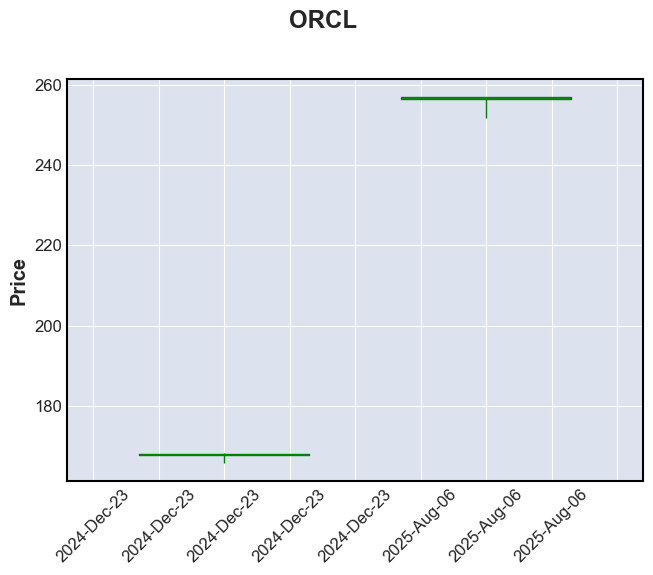

In [13]:
mpf.plot(hammer_df, type='candle', style=my_style, title=f'{stock_id}')

In [14]:
# 計算 K 線長度
df['body_length'] = abs(df['Close'] - df['Open'])

# 定義Doji型態的條件
# 一般來說，body 長度 如果 小於等於 (最高價-最低價) * 0.1
doji_condition = (
    df['body_length'] <= (df['High'] - df['Low']) * 0.1  # 中間區域非常小
)

# 提取Doji形态
doji_df = df[doji_condition]
doji_df.set_index('Date', inplace=True)

doji_df

Price,Close,High,Low,Open,Volume,8_SMA,13_SMA,20_SMA,Change,Gain,...,Avg Gain,Avg Loss,RS,RSI,EMA_8,EMA_13,MACD,body_length,lower_shadow,upper_shadow
Date,,,,,,,,,,,,,,,,,,,,,
2024-10-02,165.973297,167.428061,165.537851,165.864436,7073000,NaN,NaN,NaN,0.544296,0.544296,...,NaN,NaN,NaN,NaN,166.716696,166.827968,-0.111271,0.108862,0.326585,1.454764
2024-10-03,165.132095,166.121740,164.518521,165.161783,4735700,NaN,NaN,NaN,-0.841202,0.000000,...,NaN,NaN,NaN,NaN,166.364563,166.585700,-0.221137,0.029688,0.613575,0.959956
2024-10-22,173.884705,174.420323,172.863080,174.023566,5510100,173.600786,173.007602,NaN,1.537384,1.537384,...,1.143647,0.578547,1.976759,66.406412,173.131671,172.426006,0.705665,0.138861,1.021625,0.396757
2024-11-01,168.637726,170.869433,167.725207,168.766659,5680600,171.007050,171.935305,172.403227,2.162292,2.162292,...,0.619208,1.051380,0.588948,37.065289,170.567616,171.059958,-0.492342,0.128933,0.912518,2.102774
2024-11-20,189.199188,189.417401,186.293017,189.347963,4860200,186.534775,183.323499,178.978460,1.834976,1.834976,...,2.079387,0.456262,4.557443,82.006114,185.481533,183.410940,2.070593,0.148774,2.906172,0.069438
2024-12-04,186.659988,188.246971,184.388598,186.471531,8906300,184.820076,185.573516,185.701850,5.256912,5.256912,...,1.416247,1.518269,0.932803,48.261682,184.342130,184.284448,0.057682,0.188458,2.082933,1.586983
2024-12-11,177.128128,179.905367,173.408616,176.552842,13188700,183.147537,184.287900,185.162769,0.833176,0.833176,...,1.365235,2.227454,0.612913,38.000374,182.597614,183.328469,-0.730855,0.575286,3.144226,2.777239
2025-01-14,155.420258,156.354909,153.471423,155.529632,7410200,159.825235,162.871316,164.750201,2.376389,2.376389,...,0.448882,1.367482,0.328254,24.713220,158.925784,161.696337,-2.770553,0.109374,1.948835,0.825277
2025-01-31,169.091995,172.015263,168.167296,169.440009,8704600,171.397545,167.257112,164.876204,-0.318192,0.000000,...,3.311756,2.206653,1.500805,60.012873,167.699055,167.338908,0.360147,0.348014,0.924699,2.575254


In [15]:
doji_df.index

DatetimeIndex(['2024-10-02', '2024-10-03', '2024-10-22', '2024-11-01',
               '2024-11-20', '2024-12-04', '2024-12-11', '2025-01-14',
               '2025-01-31', '2025-02-14', '2025-03-11', '2025-03-27',
               '2025-04-11', '2025-05-05', '2025-06-06', '2025-06-10',
               '2025-06-18', '2025-07-01', '2025-07-09', '2025-07-14',
               '2025-08-05', '2025-08-06', '2025-08-08', '2025-08-14',
               '2025-08-21', '2025-09-05'],
              dtype='datetime64[ns]', name='Date', freq=None)

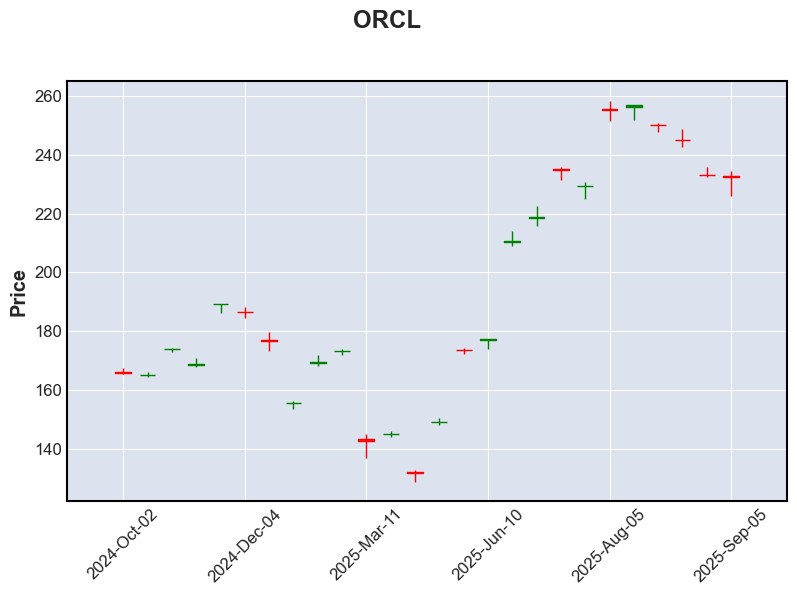

In [16]:
mpf.plot(doji_df, type='candle', style=my_style, title=f'{stock_id}', figsize=(10, 6))

In [17]:
import numpy as np  # 引入 numpy，用於數據處理和數值運算
from sklearn.model_selection import train_test_split  # 引入 train_test_split，用於將數據集拆分為訓練集和測試集
from sklearn.metrics import mean_squared_error  # 引入 mean_squared_error 用於評估模型性能

In [18]:
# 標籤: 預測未來1天的價格，舉例說明:用技術指標預測隔天的收盤價
n = 1
df['Future_Price'] = df['Close'].shift(-n)

# 去除缺失值
df.dropna(inplace=True)

# 使用特徵
X = df[['20_SMA', 'RSI', 'MACD']]

# 標籤（未來價格）
y = df['Future_Price']

X.shape, y.shape

((225, 3), (225,))

In [19]:
# 將數據集 X 和標籤 y 拆分為訓練集和測試集
# test_size=0.2 表示測試集佔全部數據的 20% --> 80% 的資料作為訓練，20% 的資料作為測試
# shuffle=False 表示在拆分數據時不打亂原始數據的順序
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# 查看拆分後訓練集和測試集的形狀
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((180, 3), (45, 3), (180,), (45,))

In [20]:
# 引入線性回歸模型
from sklearn.linear_model import LinearRegression

# 建立並訓練線性回歸模型
model = LinearRegression()
model.fit(X_train, y_train)

# 預測
y_pred = model.predict(X_test)

# 評估
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print(f"線性回歸模型RMSE: {rmse:.2f}")

# 使用模型進行未來價格走勢預測
future_pred = model.predict(X[-1:])  # 使用最新的數據進行預測
print(f"線性回歸模型預測未來{n}天的價格: {future_pred[0]:.2f}")

線性回歸模型RMSE: 17.33
線性回歸模型預測未來1天的價格: 292.33


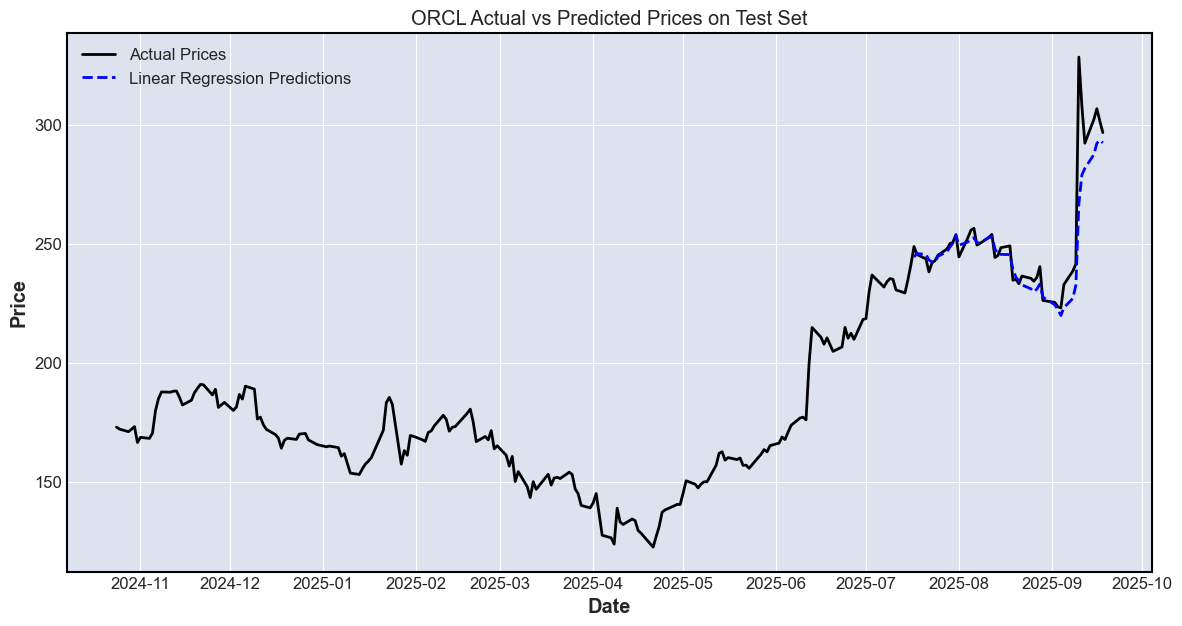

In [21]:
# 畫出測試集的實際價格與預測價格走勢圖
plt.figure(figsize=(14, 7))
plt.plot(df['Date'], df['Close'], label='Actual Prices', color='black', linewidth=2)
plt.plot(df['Date'][-len(y_test):], y_pred, label='Linear Regression Predictions', linestyle='--', color='blue')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('ORCL Actual vs Predicted Prices on Test Set')
plt.legend()
plt.grid(True)
plt.show()

In [22]:
from sklearn.tree import DecisionTreeRegressor

# 建立並訓練決策數模型
model = DecisionTreeRegressor()
model.fit(X_train, y_train)

# 預測
y_pred = model.predict(X_test)

# 評估
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print(f"決策樹模型RMSE: {rmse:.2f}")

future_pred = model.predict(X[-1:])
print(f"決策樹模型預測未來{n}天的價格: {future_pred[0]:.2f}")

決策樹模型RMSE: 62.29
決策樹模型預測未來1天的價格: 241.30


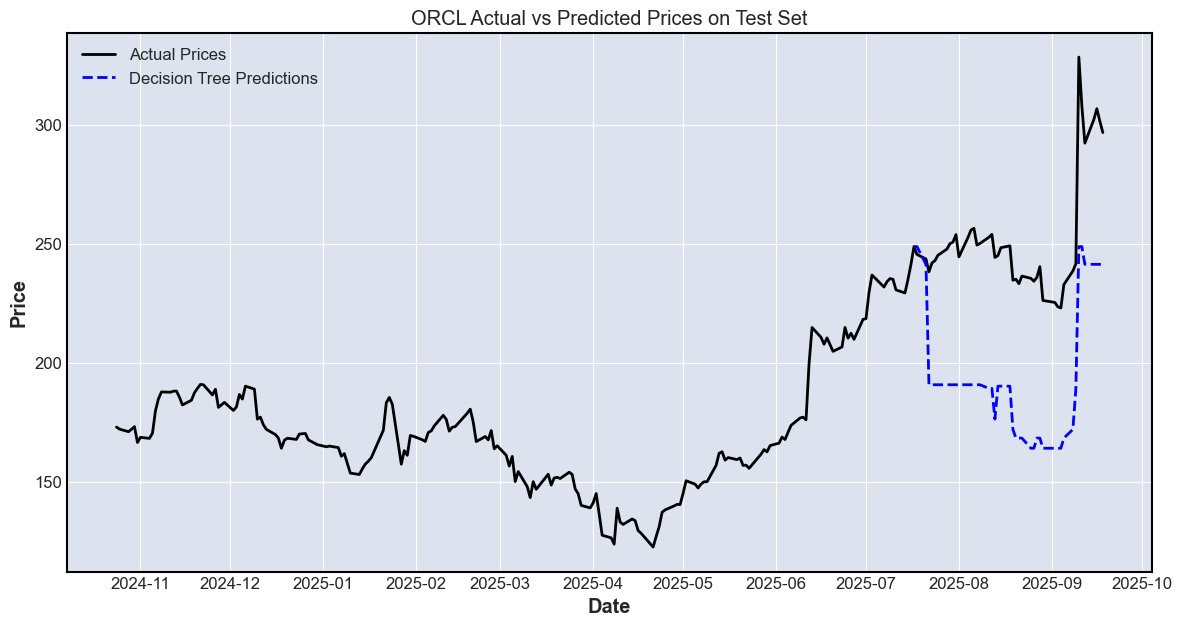

In [23]:
# 畫出測試集的實際價格與預測價格走勢圖
plt.figure(figsize=(14, 7))
plt.plot(df['Date'], df['Close'], label='Actual Prices', color='black', linewidth=2)
plt.plot(df['Date'][-len(y_test):], y_pred, label='Decision Tree Predictions', linestyle='--', color='blue')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('ORCL Actual vs Predicted Prices on Test Set')
plt.legend()
plt.grid(True)
plt.show()

In [24]:
# 引入隨機森林模型
from sklearn.ensemble import RandomForestRegressor

# 建立並訓練決策數模型
model = RandomForestRegressor()
model.fit(X_train, y_train)

# 預測
y_pred = model.predict(X_test)

# 評估
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print(f"隨機森林模型RMSE: {rmse:.2f}")

future_pred = model.predict(X[-1:])
print(f"隨機森林模型預測未來{n}天的價格: {future_pred[0]:.2f}")

隨機森林模型RMSE: 65.47
隨機森林模型預測未來1天的價格: 240.07


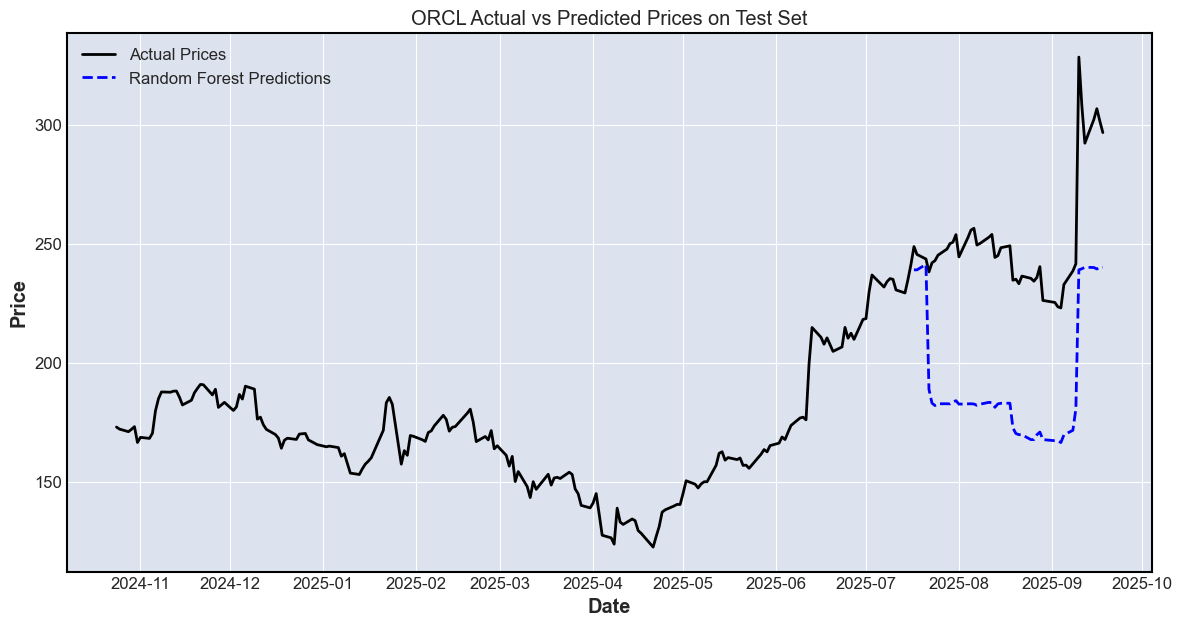

In [25]:
# 畫出測試集的實際價格與預測價格走勢圖
plt.figure(figsize=(14, 7))
plt.plot(df['Date'], df['Close'], label='Actual Prices', color='black', linewidth=2)
plt.plot(df['Date'][-len(y_test):], y_pred, label='Random Forest Predictions', linestyle='--', color='blue')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('ORCL Actual vs Predicted Prices on Test Set')
plt.legend()
plt.grid(True)
plt.show()

In [26]:
# 找最佳模型(以相同Train資料)
from sklearn.metrics import mean_squared_error
import numpy as np
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression

models = {
    "SVR(RBF)": Pipeline([
        ("scaler", StandardScaler()),
        ("svr", SVR(kernel="rbf", C=100, epsilon=0.1, gamma="scale"))
    ]),
    "DecisionTree": DecisionTreeRegressor(random_state=42, max_depth=None),
    "GradientBoosting": GradientBoostingRegressor(random_state=42),
    "KNN": Pipeline([
        ("scaler", StandardScaler()),
        ("knn", KNeighborsRegressor(n_neighbors=5))
    ]),
    "LinearRegression": LinearRegression()
}

results = {}
for name, mdl in models.items():
    mdl.fit(X_train, y_train)
    pred = mdl.predict(X_test)
    rmse = np.sqrt(mean_squared_error(y_test, pred))
    future_pred = mdl.predict(X[-1:])
    results[name] = rmse
    print(f"{name:>16} | RMSE: {rmse:.2f} | 未來{n}天預測: {future_pred[0]:.2f}")

best = min(results, key=results.get)
print(f"\n最佳模型：{best}（RMSE={results[best]:.2f}）")

        SVR(RBF) | RMSE: 64.86 | 未來1天預測: 181.61
    DecisionTree | RMSE: 62.30 | 未來1天預測: 248.75
GradientBoosting | RMSE: 58.85 | 未來1天預測: 240.92
             KNN | RMSE: 40.03 | 未來1天預測: 235.78
LinearRegression | RMSE: 17.33 | 未來1天預測: 292.33

最佳模型：LinearRegression（RMSE=17.33）


In [27]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print(f"LinearRegression 模型RMSE: {rmse:.2f}")

future_pred = model.predict(X[-1:])
print(f"LinearRegression 預測未來{n}天的價格: {future_pred[0]:.2f}")


LinearRegression 模型RMSE: 17.33
LinearRegression 預測未來1天的價格: 292.33


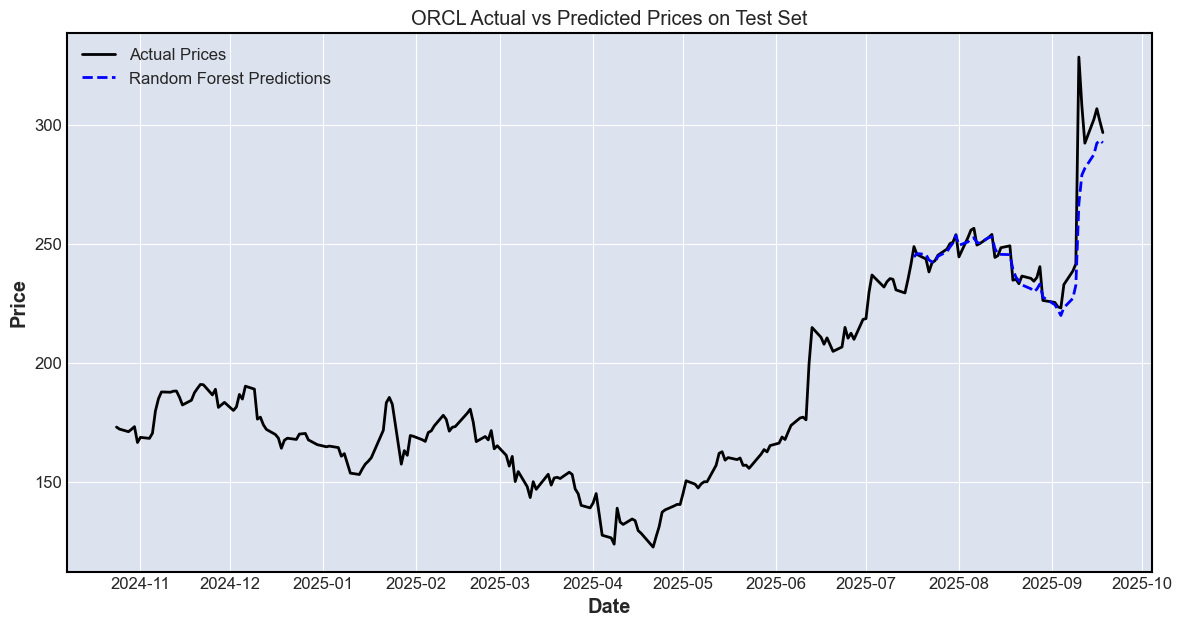

In [28]:
# 畫出測試集的實際價格與預測價格走勢圖--LinearRegression
plt.figure(figsize=(14, 7))
plt.plot(df['Date'], df['Close'], label='Actual Prices', color='black', linewidth=2)
plt.plot(df['Date'][-len(y_test):], y_pred, label='Random Forest Predictions', linestyle='--', color='blue')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('ORCL Actual vs Predicted Prices on Test Set')
plt.legend()
plt.grid(True)
plt.show()